# Visualization of final results for the Paper

Active learning 
| Sangwook Cheon 

IOU Performance for all methods against total # images seen

Best: 0.6179866969631701
Worst: 0.6130527803034834
Middle: 0.6169050073505365
WRONG RUN_ID
Uniform: nan
Random: 0.6171494292369945
Percentile=0.1: 0.6203796693811485


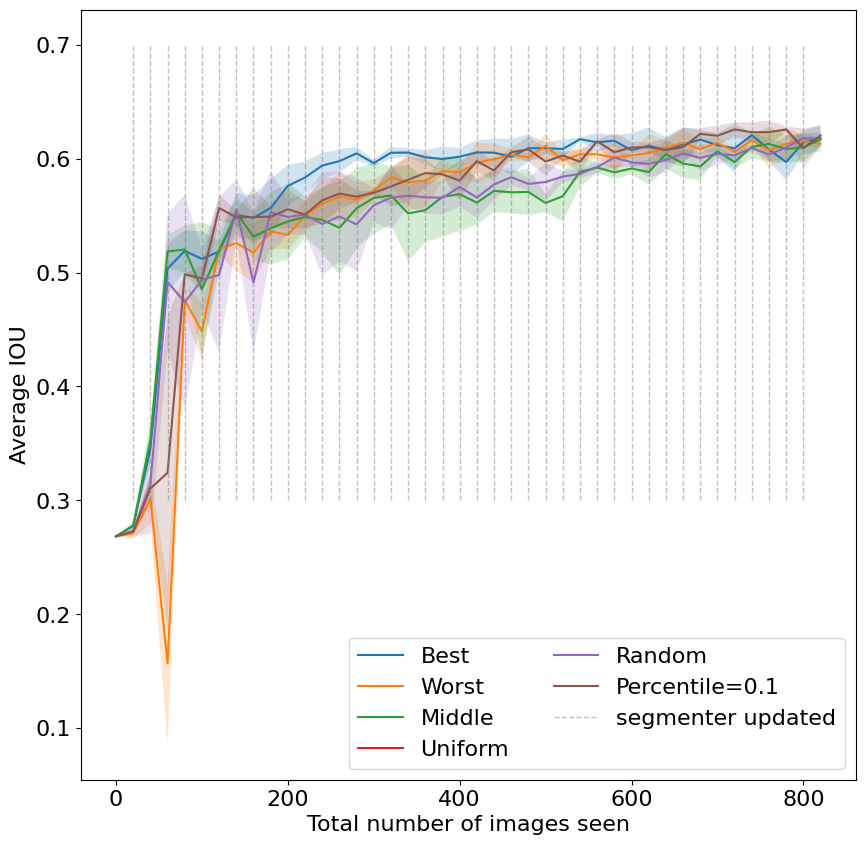

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
# sns.set()
fig.patch.set_facecolor('white')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

gk_base_path = '/usr/xtmp/gk122/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
sc_base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
vs_base_path = '/usr/xtmp/vs196/ReRunOutputs/AllOracleRuns/'

oracle_methods = {
      'Best': [
            os.path.join(vs_base_path, 'Run_1_10_best_44_44'),
            os.path.join(vs_base_path, 'Run_1_21_best_33_33'), #DOESN'T WORK 7867753 (33)
            os.path.join(vs_base_path, 'Run_1_10_best_22_22'),
            ],
      'Worst': [
            os.path.join(vs_base_path, 'Run_1_21_worst_33_33'), #doesn't work 7867756 (33)
            os.path.join(vs_base_path, 'Run_1_21_worst_22_22'), #doesn't work 7867757 (22)
            os.path.join(vs_base_path, 'Run_1_21_worst_44_44'), #doesn't work (weird negative dip) 7867766 (44)
            ],
      'Middle': [
            os.path.join(vs_base_path, 'Run_1_21_middle_44_44'), #doesn't work 7867758 (22)
            os.path.join(vs_base_path, 'Run_1_21_middle_33_33'), #doesn't work 7867759 (33)
            os.path.join(vs_base_path, 'Run_1_21_middle_22_22'), #doesn't work 7867762 (44)
            ],
      'Uniform': [
            os.path.join(vs_base_path, 'Run_1_21_uniform_22_22'), #doesn't work 7867763 (22)
            os.path.join(vs_base_path, 'Run_1_11_uniform_33_33'),
            os.path.join(vs_base_path, 'Run_1_11_uniform_44_44'),
            ],
      'Random': [
            os.path.join(vs_base_path, 'Run_1_11_random_22_22'),
            os.path.join(vs_base_path, 'Run_1_11_random_33_33'),
            os.path.join(vs_base_path, 'Run_1_11_random_44_44'),
            ],
      'Percentile=0.1': [
            os.path.join(vs_base_path, 'Run_1_11_p01_22_22'),
            os.path.join(vs_base_path, 'Run_1_11_p01_33_33'),
            os.path.join(vs_base_path, 'Run_1_11_p01_44_44'),
            ],
}

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)

            if len(df) != 42:
                  print('WRONG RUN_ID')

            values = df.IOU.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      # plt.fill_between(x, y - std, y + std, alpha=0.5)
      plt.fill_between(x, y - 1 * std, y + 1 * std, alpha=0.2) # is technically supposed to be this
    
plt.vlines(x=[list(range(20, 820, 20))], ymin=0.3, ymax=0.7, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.xlabel("Total number of images seen")
plt.ylabel('Average IOU')
plt.legend(ncol=2, loc='lower right')

Total # approved labels against total # images seen, for every method

Best: 373.0
Worst: 363.3333333333333
Middle: 356.3333333333333
Uniform: nan
Random: 362.6666666666667
Percentile=0.1: 367.6666666666667


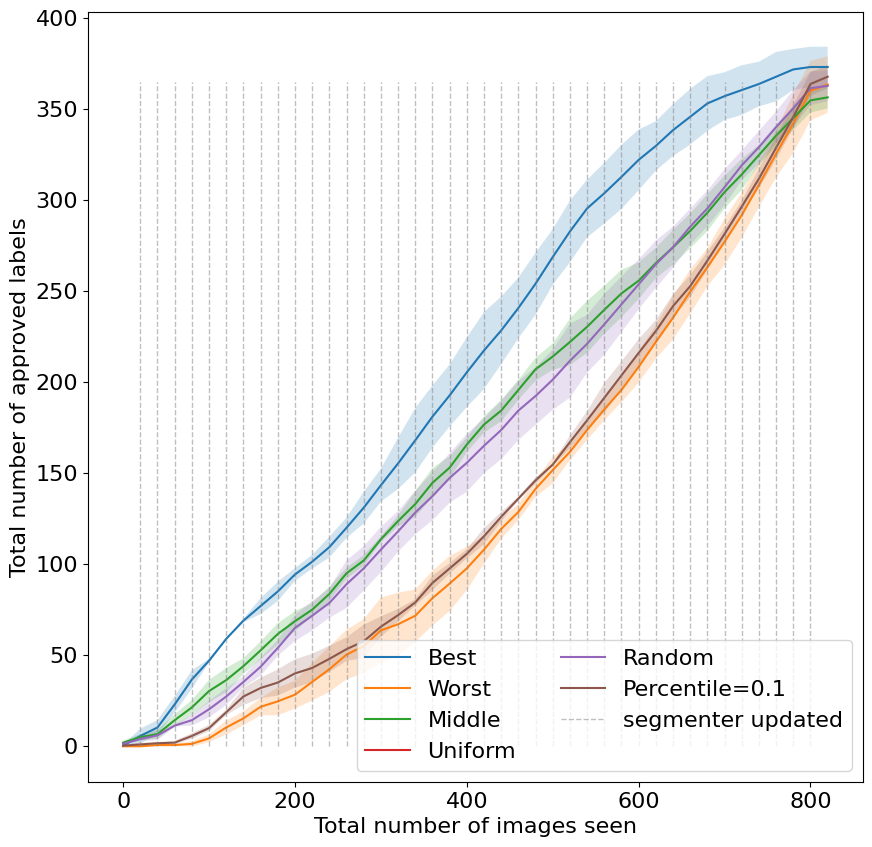

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)
            
            df['num_correctly_labelled'] = df.loc[:, 'img_seen'] - df.loc[:, 'num_manually_labelled']
            values = df.num_correctly_labelled.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      plt.fill_between(x, y - std, y + std, alpha=0.2)
      # plt.fill_between(x, y - 2 * std, y + 2 * std, alpha=0.5) # is technically supposed to be this

plt.vlines(x=[list(range(20, 820, 20))], ymin=0, ymax=365, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.xlabel("Total number of images seen")
plt.ylabel('Total number of approved labels')
plt.legend(ncol=2, loc='lower right')

IOU performance against total # images seen for each percentile method

Percentile=0.1: 0.6203796693811485
Percentile=0.2: 0.6317569936566247
Percentile=0.3: 0.6290691686804966
Percentile=0.4: 0.6164288706030853
Percentile=0.6: 0.6052214768590806
Percentile=0.7: 0.5955698307825518
Percentile=0.8: 0.5922171838505199
Percentile=0.9: 0.604481698058285


Text(0, 0.5, 'Average IOU')

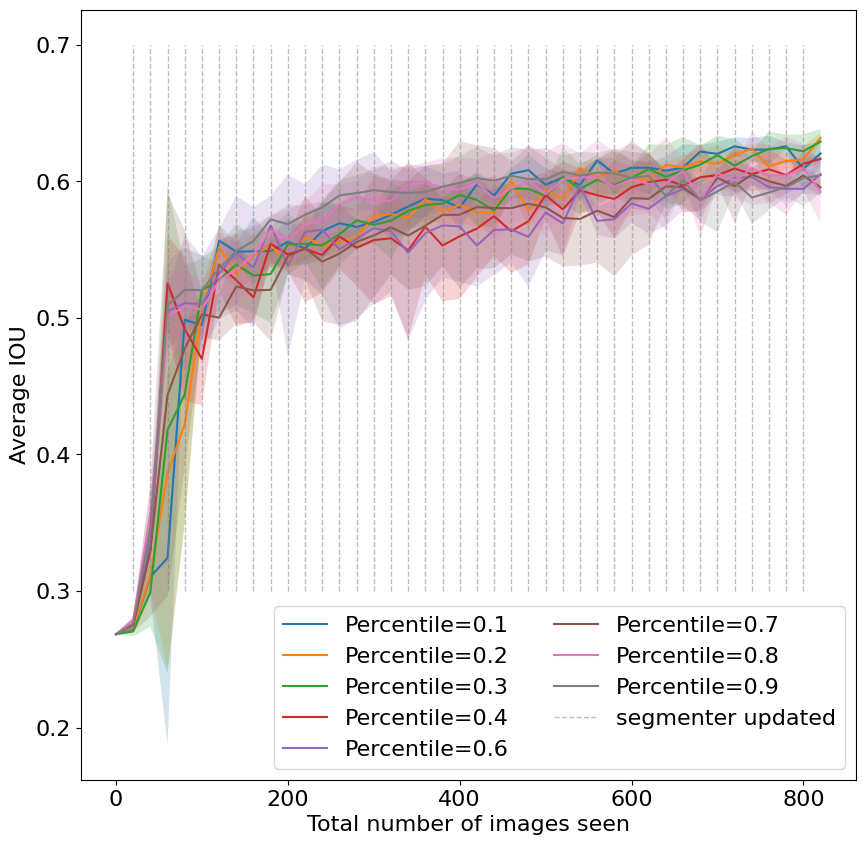

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

gk_base_path = '/usr/xtmp/vs196/ReRunOutputs/AllOracleRuns/'
sc_base_path = '/usr/xtmp/vs196/ReRunOutputs/AllOracleRuns/'

oracle_methods = {
      'Percentile=0.1': [
            os.path.join(sc_base_path, 'Run_1_11_p01_22_22'),
            os.path.join(sc_base_path, 'Run_1_11_p01_33_33'),
            os.path.join(sc_base_path, 'Run_1_11_p01_44_44'),
            ],
      'Percentile=0.2': [
            os.path.join(sc_base_path, 'Run_1_11_p02_22_22'),
            os.path.join(sc_base_path, 'Run_1_11_p02_33_33'),
            os.path.join(sc_base_path, 'Run_1_11_p02_44_44'),
            ],
      'Percentile=0.3': [
            os.path.join(gk_base_path, 'Run_1_11_p03_22_22'),
            os.path.join(sc_base_path, 'Run_1_11_p03_33_33'),
            os.path.join(gk_base_path, 'Run_1_11_p03_44_44'),
            ],
      'Percentile=0.4': [
            os.path.join(gk_base_path, 'Run_1_11_p04_22_22'),
            os.path.join(gk_base_path, 'Run_1_11_p04_33_33'),
            os.path.join(sc_base_path, 'Run_1_11_p04_44_44'),
            ],
      'Percentile=0.6': [
            os.path.join(sc_base_path, 'Run_1_11_p06_22_22'),
            os.path.join(gk_base_path, 'Run_1_11_p06_33_33'),
            os.path.join(gk_base_path, 'Run_1_11_p06_44_44'),
            ],
      'Percentile=0.7': [
            os.path.join(sc_base_path, 'Run_1_11_p07_22_22'),
            os.path.join(gk_base_path, 'Run_1_11_p07_33_33'),
            os.path.join(sc_base_path, 'Run_1_11_p07_44_44'),
      ],
      'Percentile=0.8': [
            os.path.join(gk_base_path, 'Run_1_11_p08_22_22'),
            os.path.join(sc_base_path, 'Run_1_11_p08_33_33'),
            os.path.join(gk_base_path, 'Run_1_11_p08_44_44'),
            ],
      'Percentile=0.9': [
            os.path.join(sc_base_path, 'Run_1_11_p09_22_22'),
            os.path.join(sc_base_path, 'Run_1_11_p09_33_2_33'),
            os.path.join(sc_base_path, 'Run_1_11_p09_44_3_44'),
            ],
}

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)

            if len(df) != 42:
                  print('WRONG RUN_ID')

            values = df.IOU.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      plt.fill_between(x, y - std, y + std, alpha=0.2)
      # plt.fill_between(x, y - 2 * std, y + 2 * std, alpha=0.5) # is technically supposed to be this

plt.vlines(x=[list(range(20, 820, 20))], ymin=0.3, ymax=0.7, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.legend(ncol=2, loc='lower right')
plt.xlabel("Total number of images seen")
plt.ylabel('Average IOU')

Total # of approved labels against total # images seen for each percentile method

Percentile=0.1: 367.6666666666667
Percentile=0.2: 365.3333333333333
Percentile=0.3: 365.0
Percentile=0.4: 359.6666666666667
Percentile=0.6: 367.0
Percentile=0.7: 357.6666666666667
Percentile=0.8: 366.3333333333333
Percentile=0.9: 357.0


Text(0, 0.5, 'Total number of approved labels')

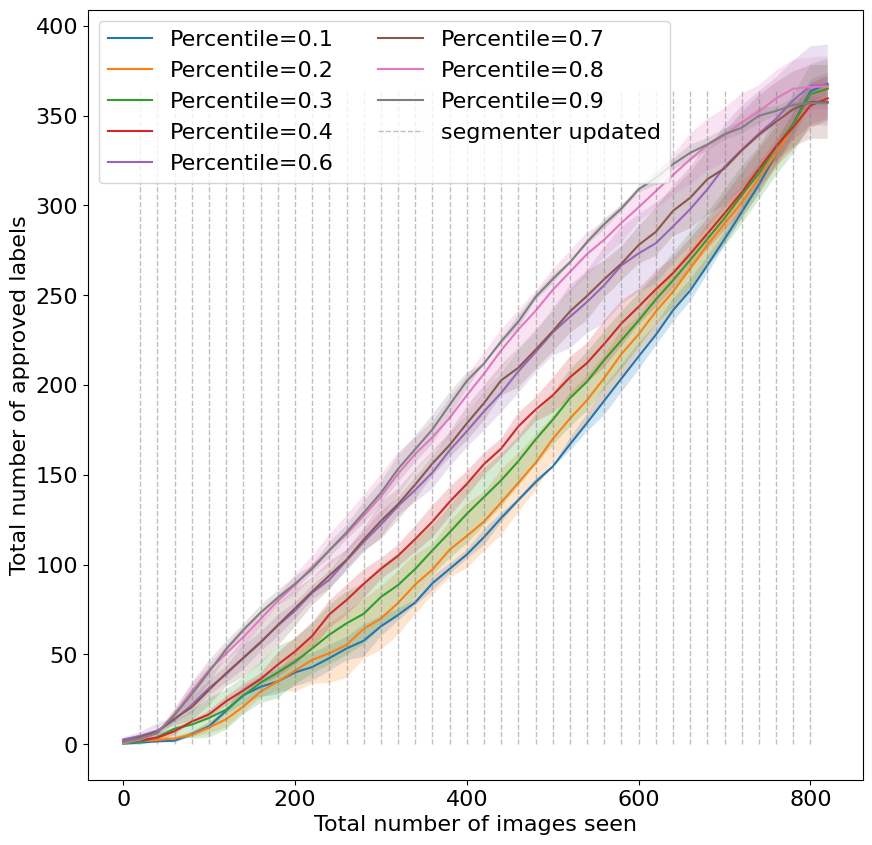

In [4]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

for oracle_method in oracle_methods:
      dfs = pd.DataFrame(0, index=range(42), columns=['avg'])

      for run in oracle_methods[oracle_method]:
            cur = os.path.join(run, "segmenter_output.csv")
            df = pd.read_csv(cur)
            
            df['num_correctly_labelled'] = df.loc[:, 'img_seen'] - df.loc[:, 'num_manually_labelled']
            values = df.num_correctly_labelled.reset_index(drop=True)
            dfs['avg'] += values
            dfs[run] = values
      
      dfs['avg'] /= len(oracle_methods[oracle_method])

      std = dfs.loc[:, dfs.columns != 'avg'].std(axis=1)

      x = [i for i in range (0, 824, 20)]
      y = dfs.avg
      print(f'{oracle_method}: {y[41]}')
      plt.plot(x, y, label=oracle_method)
      plt.fill_between(x, y - std, y + std, alpha=0.2)
      # plt.fill_between(x, y - 2 * std, y + 2 * std, alpha=0.5) # is technically supposed to be this

plt.vlines(x=[list(range(20, 820, 20))], ymin=0, ymax=365, colors='gray', ls='--', lw=1, label='segmenter updated', alpha=0.5)
plt.legend(ncol=2, loc='upper left')
plt.xlabel("Total number of images seen")
plt.ylabel('Total number of approved labels')